<a href="https://colab.research.google.com/github/sanchitkalra/bits-f312-nnfl/blob/main/Assignment_1_Q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)

In [ ]:
pip install openpyxl==3.0.9

In [ ]:
data_x_tr = pd.read_excel('/content/drive/MyDrive/Q3_data/Xtr.xlsx',header=None)
data_y_tr = pd.read_excel('/content/drive/MyDrive/Q3_data/Ytr.xlsx',header=None)
data_x_te = pd.read_excel('/content/drive/MyDrive/Q3_data/Xte.xlsx',header=None)
data_y_te = pd.read_excel('/content/drive/MyDrive/Q3_data/Yte.xlsx',header=None)
print(data_x_tr)

              0           1           2   ...        57        58        59
0     242.751526  281.801298  250.032405  ...  1.603211  1.281972  1.844860
1     216.585951  297.057883  300.938478  ...  1.572927  1.598582  1.625395
2     265.735536  339.271134  269.817305  ...  1.849940  1.848160  1.706134
3     207.631953  255.284282  254.563071  ...  1.682881  1.710404  1.664391
4     205.016124  333.265999  536.342842  ...  1.740251  1.703264  1.535684
...          ...         ...         ...  ...       ...       ...       ...
1584  665.391855  494.366515  443.407866  ...  1.695298  1.795109  1.492727
1585  339.816405  175.630241  269.201049  ...  1.710592  1.481917  1.783480
1586  556.132519  235.733722  220.828873  ...  1.984738  1.914010  1.843007
1587  719.112452  341.105932  312.378736  ...  1.653615  1.710778  1.810020
1588  852.985752  314.878301  596.409431  ...  1.722815  1.601319  2.050582

[1589 rows x 60 columns]


In [ ]:
#datan = data.values
# Normalise X_tr
X = data_x_tr.values
print(X.shape)
m = X.shape[0]
xmin = np.min(X, axis = 0)
xmax = np.max(X, axis = 0)
X = (X-xmin)/(xmax - xmin)
print(X)

(1589, 60)
[[0.16945623 0.2251033  0.25645937 ... 0.29561677 0.61323606 0.70802578]
 [0.141864   0.24309343 0.34701668 ... 0.24896462 0.7646875  0.51805187]
 [0.19369343 0.29287006 0.29165492 ... 0.67570485 0.88407402 0.58794075]
 ...
 [0.4999241  0.17078176 0.20450893 ... 0.88336273 0.91557361 0.70642164]
 [0.6717904  0.2950336  0.36736786 ... 0.37326474 0.81835672 0.67786687]
 [0.81296304 0.26410674 0.87263278 ... 0.47986836 0.76599688 0.88610294]]


In [ ]:
pp = np.ones([m, 1]) # vector containg ones as all elements
X = np.append(pp,X, axis=1) #Column of ones
print(X.shape)

(1589, 61)


In [ ]:
#datan = data.values
# Normalise X_te
X_te = data_x_te.values
print(X_te.shape)
m_x_te = X_te.shape[0]
xmin_te = np.min(X_te, axis = 0)
xmax_te = np.max(X_te, axis = 0)
X_te = (X_te-xmin_te)/(xmax_te - xmin_te)
print(X_te)

(119, 60)
[[0.17126482 0.34983325 0.08057599 ... 0.39354752 0.41319946 0.49604447]
 [0.15187932 0.28998096 0.08954196 ... 0.80181062 0.79779337 0.78415153]
 [0.11590663 0.17162903 0.13452746 ... 0.31121014 0.88689751 0.65691557]
 ...
 [1.         0.77959334 0.40524571 ... 0.55703696 0.27745622 0.68992496]
 [0.38232684 0.72240899 0.59936652 ... 0.40596817 0.2834247  0.82478336]
 [0.77843807 0.74346601 0.48271042 ... 0.1627486  0.11766611 0.858952  ]]


In [ ]:
pp = np.ones([m_x_te, 1]) # vector containg ones as all elements
X_te = np.append(pp,X_te, axis=1) #Column of ones
print(X_te.shape)

(119, 61)


In [ ]:
y=data_y_tr.values[:,0] #output
print(y.shape)
y = y-1#Normalization
print(y)

(1589,)
[0. 0. 0. ... 1. 1. 1.]


In [ ]:
y_te = data_y_te.values[:, 0]
print(y_te.shape)
y_te = y_te - 1
print(y_te)

(119,)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
def sigmoid(z):
  return 1.0/(1 + np.exp(-z)) ###activation function

In [ ]:
def cost_function(X,y,w): ###define cost function
  hypothesis = sigmoid(np.dot(X,w.T)) ###calculation of hypothesis for all instances
  J =-(1/m)*(np.sum(y*(np.log(hypothesis)) + (1-y)*np.log(1-hypothesis))) ####as mention in
  return J

In [ ]:
def sign(j):
  if (j >= 0):
    return 1
  return -1

In [ ]:
def batch_gradient_descent(X,y,w,alpha,iters, lamb):
  cost_history = np.zeros(iters) # cost function for each iteration
  #initalize our cost history list to store the cost function on every iteration
  for i in range(iters):
    hypothesis = sigmoid(np.dot(X,w.T))
    w = w - ((alpha*lamb)/2)*np.sign(w) - (alpha/len(y)) * np.dot(hypothesis - y, X)
    cost_history[i] = cost_function(X,y,w)
  return w,cost_history

In [ ]:
def MB_gradient_descent(X,y,w,alpha, iters, batch_size, lamb):
  cost_history = np.zeros(iters)
  for i in range(iters):
    rand_index = np.random.randint(len(y)-batch_size)
    ind_x = X[rand_index:rand_index+batch_size]
    ind_y = y[rand_index:rand_index+batch_size]
    w = w - ((alpha*lamb)/2)*np.sign(w) - (alpha/batch_size) * (ind_x.T.dot(sigmoid(ind_x.dot(w)) - ind_y))
    cost_history[i] = cost_function(ind_x,ind_y,w)
  return w, cost_history

In [ ]:
def stochastic_gradient_descent(X,y,w,alpha, iters, lamb):
  cost_history = np.zeros(iters)
  for i in range(iters):
    rand_index = np.random.randint(len(y)-1)
    ind_x = X[rand_index:rand_index+1]
    ind_y = y[rand_index:rand_index+1]
    w = w - ((alpha*lamb)/2)*np.sign(w) - alpha * (ind_x.T.dot(sigmoid(ind_x.dot(w)) - ind_y))
    cost_history[i] = cost_function(ind_x,ind_y,w)
  return w, cost_history

In [ ]:
print(X.shape[1])
w = np.random.randn(1,X.shape[1]).ravel()
print(w)

61
[ 1.76405235  0.40015721  0.97873798  2.2408932   1.86755799 -0.97727788
  0.95008842 -0.15135721 -0.10321885  0.4105985   0.14404357  1.45427351
  0.76103773  0.12167502  0.44386323  0.33367433  1.49407907 -0.20515826
  0.3130677  -0.85409574 -2.55298982  0.6536186   0.8644362  -0.74216502
  2.26975462 -1.45436567  0.04575852 -0.18718385  1.53277921  1.46935877
  0.15494743  0.37816252 -0.88778575 -1.98079647 -0.34791215  0.15634897
  1.23029068  1.20237985 -0.38732682 -0.30230275 -1.04855297 -1.42001794
 -1.70627019  1.9507754  -0.50965218 -0.4380743  -1.25279536  0.77749036
 -1.61389785 -0.21274028 -0.89546656  0.3869025  -0.51080514 -1.18063218
 -0.02818223  0.42833187  0.06651722  0.3024719  -0.63432209 -0.36274117
 -0.67246045]


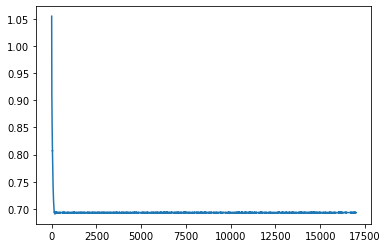

In [ ]:
alpha=0.06 ##learning rate
iters=17000 ###iterations
lamb=0.3
batch_w,J_his = batch_gradient_descent(X,y,w,alpha,iters,lamb)

plt.plot(range(iters),J_his)
plt.show()

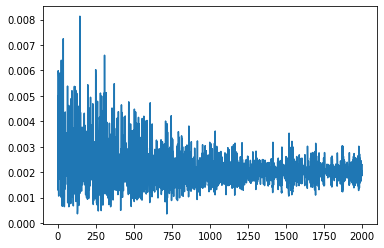

In [ ]:
alpha=0.02
iters=2000
batch_size=5
mini_batch_w,J_mini_batch = MB_gradient_descent(X,y,w,alpha,iters, batch_size, lamb)
plt.plot(range(iters),J_mini_batch)
plt.show()

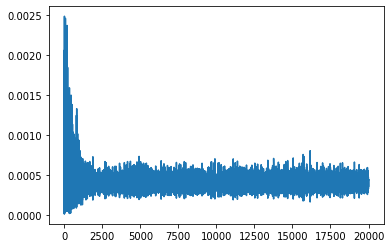

In [ ]:
n_epochs=20000
alpha=0.02
w_n,J_sgd = stochastic_gradient_descent(X,y,w, alpha, n_epochs, lamb)
plt.plot(range(n_epochs),J_sgd)
plt.show()

In [ ]:
z = np.dot(X_te, batch_w.T)
# print(z)
print(z.shape)
h = sigmoid(z)
y_pred=h>0.5
y_pred=y_pred.astype(int)
print(y_pred)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_te, y_pred)
print(cm)
accuracy=(cm[0][0]+cm[1][1])/(len(y_te))
print(accuracy)

(119,)
[0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0]
[[49  9]
 [57  4]]
0.44537815126050423


In [ ]:
z = np.dot(X_te, mini_batch_w.T)
h = sigmoid(z)
y_pred=h>0.5
y_pred=y_pred.astype(int)
print(y_pred)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_te, y_pred)
print(cm)
accuracy=(cm[0][0]+cm[1][1])/(len(y_te))
print(accuracy)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1
 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0
 0 0 1 0 0 0 0 0]
[[50  8]
 [57  4]]
0.453781512605042


In [ ]:
z = np.dot(X_te, w_n.T)
h = sigmoid(z)
y_pred=h>0.5
y_pred=y_pred.astype(int)
print(y_pred)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_te, y_pred)
print(cm)
accuracy=(cm[0][0]+cm[1][1])/(len(y_te))
print(accuracy)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1]
[[ 0 58]
 [ 0 61]]
0.5126050420168067


In the following cell, we run Grid Search to find optimal parameters for the model. In the cases that could finish running in the available runtime in Colab, an accuracy of 61.34% was achieved with the following parameters:

alpha: 0.06 iterations: 17000 lambda: 0.3

In [ ]:
from sklearn.metrics import confusion_matrix
r_alpha = range(1, 10, 1) # divide by 100
r_iters = range(1000, 20000, 1000)
r_lamb = range(5, 50, 5) # divide by 100

i_a = 0.0
i_i = 0.0
i_l = 0.0

curr_acc = 0.0

for j_alpha in r_alpha:
  for j_iters in r_iters:
    for j_lamb in r_lamb:
      batch_w,J_his = batch_gradient_descent(X,y,w,(j_alpha/100),j_iters,(j_lamb/100))
      z = np.dot(X_te, batch_w.T)
      # print(z)
      # print(z.shape)
      h = sigmoid(z)
      y_pred=h>0.5
      y_pred=y_pred.astype(int)
      # print(y_pred)
      cm=confusion_matrix(y_te, y_pred)
      # print(cm)
      accuracy=(cm[0][0]+cm[1][1])/(len(y_te))
      print(str(accuracy) + " at a: " + str(j_alpha/100) + " i: " + str(j_iters) + " l: " + str(j_lamb/100) )
      if (accuracy >= curr_acc):
        curr_acc = accuracy
        i_a = r_alpha.index(j_alpha)/100
        i_i = r_iters.index(j_iters)
        i_l = r_lamb.index(j_lamb)/100

print(i_a)
print(i_i)
print(i_l)

0.5042016806722689 at a: 0.01 i: 1000 l: 0.05
0.4369747899159664 at a: 0.01 i: 1000 l: 0.1
0.47058823529411764 at a: 0.01 i: 1000 l: 0.15
0.453781512605042 at a: 0.01 i: 1000 l: 0.2
0.4789915966386555 at a: 0.01 i: 1000 l: 0.25
0.46218487394957986 at a: 0.01 i: 1000 l: 0.3
0.46218487394957986 at a: 0.01 i: 1000 l: 0.35
0.4789915966386555 at a: 0.01 i: 1000 l: 0.4
0.4957983193277311 at a: 0.01 i: 1000 l: 0.45
0.453781512605042 at a: 0.01 i: 2000 l: 0.05
0.46218487394957986 at a: 0.01 i: 2000 l: 0.1
0.47058823529411764 at a: 0.01 i: 2000 l: 0.15
0.4957983193277311 at a: 0.01 i: 2000 l: 0.2
0.4957983193277311 at a: 0.01 i: 2000 l: 0.25
0.48739495798319327 at a: 0.01 i: 2000 l: 0.3
0.5126050420168067 at a: 0.01 i: 2000 l: 0.35
0.48739495798319327 at a: 0.01 i: 2000 l: 0.4
0.5042016806722689 at a: 0.01 i: 2000 l: 0.45
0.46218487394957986 at a: 0.01 i: 3000 l: 0.05
0.46218487394957986 at a: 0.01 i: 3000 l: 0.1
0.4957983193277311 at a: 0.01 i: 3000 l: 0.15
0.5126050420168067 at a: 0.01 i: 300